In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(Xtrain,ytrain),(Xtest,ytest) = cifar10.load_data()

170498071/170498071 [==============================] - 138s 1us/step


In [5]:
Xtrain.shape

(50000, 32, 32, 3)

In [6]:
Xtest.shape

(10000, 32, 32, 3)

In [7]:
Xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
import matplotlib.pyplot as plt

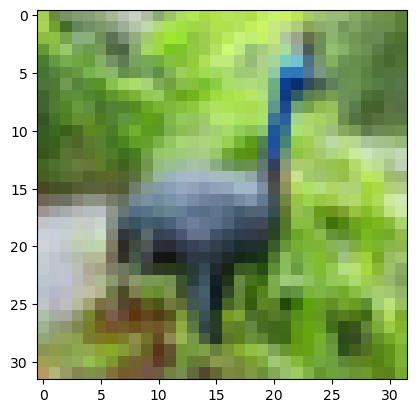

In [9]:
plt.imshow(Xtrain[6])

In [10]:
labels = ['airplane', 'automobile', 'bird', 'cat','deer','dog', 'frog','horse','ship','truck']

In [11]:
ytrain[6]

array([2], dtype=uint8)

In [12]:
labels[2]

'bird'

In [13]:
Xtrain_scaled = Xtrain/255.0

In [14]:
Xtest_scaled = Xtest/255.0

In [15]:
Xtrain[21]

array([[[252,   8,  42],
        [249,  15,  42],
        [250,   8,  39],
        ...,
        [251,   1,  11],
        [251,   0,  15],
        [251,   1,  30]],

       [[255,   7,  43],
        [252,  15,  44],
        [253,  13,  42],
        ...,
        [255,   1,  11],
        [255,   0,  18],
        [254,   4,  33]],

       [[253,   6,  42],
        [250,  16,  42],
        [250,  24,  43],
        ...,
        [254,   1,  10],
        [254,   0,  20],
        [252,   9,  37]],

       ...,

       [[254,  66,  94],
        [252,  62,  92],
        [253,  64,  93],
        ...,
        [252,  70, 101],
        [253,  69, 103],
        [252,  70, 104]],

       [[250,  49,  81],
        [252,  53,  82],
        [255,  59,  86],
        ...,
        [254,  70, 103],
        [255,  68, 100],
        [254,  59,  89]],

       [[236,  37,  68],
        [249,  48,  76],
        [250,  42,  73],
        ...,
        [250,  78, 113],
        [250,  74, 109],
        [251,  58,  88]]

In [16]:
Xtrain_scaled[21]

array([[[0.98823529, 0.03137255, 0.16470588],
        [0.97647059, 0.05882353, 0.16470588],
        [0.98039216, 0.03137255, 0.15294118],
        ...,
        [0.98431373, 0.00392157, 0.04313725],
        [0.98431373, 0.        , 0.05882353],
        [0.98431373, 0.00392157, 0.11764706]],

       [[1.        , 0.02745098, 0.16862745],
        [0.98823529, 0.05882353, 0.17254902],
        [0.99215686, 0.05098039, 0.16470588],
        ...,
        [1.        , 0.00392157, 0.04313725],
        [1.        , 0.        , 0.07058824],
        [0.99607843, 0.01568627, 0.12941176]],

       [[0.99215686, 0.02352941, 0.16470588],
        [0.98039216, 0.0627451 , 0.16470588],
        [0.98039216, 0.09411765, 0.16862745],
        ...,
        [0.99607843, 0.00392157, 0.03921569],
        [0.99607843, 0.        , 0.07843137],
        [0.98823529, 0.03529412, 0.14509804]],

       ...,

       [[0.99607843, 0.25882353, 0.36862745],
        [0.98823529, 0.24313725, 0.36078431],
        [0.99215686, 0

In [17]:
Xtest[10]

array([[[ 90, 124, 149],
        [ 90, 124, 149],
        [ 91, 125, 150],
        ...,
        [103, 131, 148],
        [100, 128, 146],
        [100, 129, 146]],

       [[ 92, 127, 153],
        [ 93, 127, 152],
        [ 94, 128, 153],
        ...,
        [114, 137, 151],
        [103, 130, 148],
        [102, 132, 152]],

       [[ 93, 128, 153],
        [ 93, 127, 152],
        [ 94, 128, 152],
        ...,
        [114, 133, 145],
        [103, 129, 147],
        [101, 132, 152]],

       ...,

       [[101, 133, 154],
        [101, 132, 153],
        [102, 133, 154],
        ...,
        [ 94, 124, 150],
        [ 92, 122, 148],
        [ 91, 122, 148]],

       [[100, 131, 153],
        [101, 132, 153],
        [102, 133, 154],
        ...,
        [ 93, 123, 149],
        [ 90, 120, 146],
        [ 90, 121, 147]],

       [[ 99, 130, 152],
        [100, 130, 151],
        [101, 132, 153],
        ...,
        [ 92, 122, 148],
        [ 90, 120, 146],
        [ 89, 120, 146]]

In [18]:
Xtest_scaled[10]

array([[[0.35294118, 0.48627451, 0.58431373],
        [0.35294118, 0.48627451, 0.58431373],
        [0.35686275, 0.49019608, 0.58823529],
        ...,
        [0.40392157, 0.51372549, 0.58039216],
        [0.39215686, 0.50196078, 0.57254902],
        [0.39215686, 0.50588235, 0.57254902]],

       [[0.36078431, 0.49803922, 0.6       ],
        [0.36470588, 0.49803922, 0.59607843],
        [0.36862745, 0.50196078, 0.6       ],
        ...,
        [0.44705882, 0.5372549 , 0.59215686],
        [0.40392157, 0.50980392, 0.58039216],
        [0.4       , 0.51764706, 0.59607843]],

       [[0.36470588, 0.50196078, 0.6       ],
        [0.36470588, 0.49803922, 0.59607843],
        [0.36862745, 0.50196078, 0.59607843],
        ...,
        [0.44705882, 0.52156863, 0.56862745],
        [0.40392157, 0.50588235, 0.57647059],
        [0.39607843, 0.51764706, 0.59607843]],

       ...,

       [[0.39607843, 0.52156863, 0.60392157],
        [0.39607843, 0.51764706, 0.6       ],
        [0.4       , 0

In [19]:
model = Sequential([
 
    Flatten(input_shape=(32,32,3)),
    Dense(128,'relu'),
    Dense(64,'relu'),
    Dense(32,'relu'),
    Dense(64,'relu'),
    Dense(128,'relu'),
    Dense(10,'softmax')
])

In [20]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(Xtrain_scaled,ytrain,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 13ms/step - loss: 1.8802 - accuracy: 0.3104
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.7437 - accuracy: 0.3664
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6804 - accuracy: 0.3925
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6312 - accuracy: 0.4115
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5919 - accuracy: 0.4245
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5629 - accuracy: 0.4365
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5318 - accuracy: 0.4467
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5109 - accuracy: 0.4566
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4922 - accuracy: 0.4621
Epoch 10/10
1563/1563 [==============================] - 18s 12m

In [22]:
model.evaluate(Xtest_scaled,ytest)

313/313 [==============================] - 2s 4ms/step - loss: 1.4764 - accuracy: 0.4752


[1.4763565063476562, 0.47519999742507935]